# Attempt at NN

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from path import Path
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
# Set the random seed for reproducibility
# Note: This is for the homework solution, but it is good practice to comment this out and run multiple experiments to evaluate your model
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [97]:
file_path = Path("../../../../data/cleandata/success_PCA_df.csv")
df = pd.read_csv(file_path)
df.iloc[1]

rank_cnc                                       7
Name                                         EOS
Ticker                                       EOS
market_cap                           3.27737e+09
price                                      21.07
volume24                             2.31847e+08
pct1h                                      -0.46
pct24h                                     -1.33
pct7d                                       2.49
country                           Cayman Islands
platform                          Own Blockchain
pre_ico_end                  2017-09-28 03:00:00
pre_ico_start                2017-09-28 03:00:00
rating                                         0
status                                   Trading
type                                         ICO
End                          2018-06-12 00:00:00
Start                        2017-06-26 16:00:00
Duration                                      20
pre_Duration           0 days 00:00:00.000000000
compound            

In [98]:
df.columns

Index(['rank_cnc', 'Name', 'Ticker', 'market_cap', 'price', 'volume24',
       'pct1h', 'pct24h', 'pct7d', 'country', 'platform', 'pre_ico_end',
       'pre_ico_start', 'rating', 'status', 'type', 'End', 'Start', 'Duration',
       'pre_Duration', 'compound', 'negative', 'neutral', 'positive',
       'no_of_posts', 'Longevity', 'custom_index', 'custom_index_scaled',
       'success_index', 'success_PCA'],
      dtype='object')

In [100]:
X = df.drop(columns = ['Name','Ticker','country','platform','status','type','pre_ico_end','pre_ico_start','End','Start','pre_Duration','success_index']).values
X

array([[           nan,            nan,            nan, ...,
        1.78673600e+04, 1.59556543e-02, 1.00000000e+00],
       [7.00000000e+00, 3.27737266e+09, 2.10700000e+01, ...,
        1.78524000e+03, 1.59422948e-03, 1.00000000e+00],
       [8.00000000e+00, 3.21489339e+09, 3.42000000e+00, ...,
        4.47440460e+01, 3.99566716e-05, 1.00000000e+00],
       ...,
       [2.34800000e+03, 0.00000000e+00, 2.12000000e-04, ...,
        9.20000000e-03, 8.19913006e-09, 0.00000000e+00],
       [2.35800000e+03, 0.00000000e+00, 4.60000000e-04, ...,
        2.52824000e-01, 2.25756751e-07, 0.00000000e+00],
       [2.36200000e+03, 0.00000000e+00, 5.72000000e-04, ...,
        7.07200000e-03, 6.29881392e-09, 0.00000000e+00]])

In [88]:
y = df["success_PCA"].values


In [89]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [90]:
# Define the model - shallow neural network
nn = Sequential()

# Hidden layer
nn.add(Dense(units=8, input_dim=18, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="linear"))

In [91]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model = nn.fit(X, y, epochs=200, verbose=0)

In [92]:
# Save model as JSON
nn_json = nn.to_json()

file_path = Path("../NN_model/model_PCA_nn.json")

with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Save weights
file_path = Path("../NN_model/model_PCA_nn.h5")
nn.save_weights(file_path)

In [93]:
# Load the saved model to make predictions
from tensorflow.keras.models import model_from_json

# load json and create model
file_path = Path("../NN_model/model_PCA_nn.json")

with open(file_path, "r") as json_file:
    model_json = json_file.read()
    
loaded_model = model_from_json(model_json)

# load weights into new model
file_path = Path("../NN_model/model_PCA_nn.h5")
loaded_model.load_weights("../NN_model/model_PCA_nn.h5")

In [96]:
df["predicted_NN"] = loaded_model.predict(X)
df.iloc[df.index[df['success_PCA'] == 1].tolist()]

,rank_cnc,Name,Ticker,market_cap,price,volume24,pct1h,pct24h,pct7d,country,...,negative,neutral,positive,no_of_posts,Longevity,custom_index,custom_index_scaled,success_index,success_PCA,predicted_NN
0,NaN,Binance Coin,BNB,NaN,NaN,NaN,NaN,NaN,NaN,Japan,...,NaN,NaN,NaN,NaN,NaN,17867.360000,0.015956,1,1,NaN
1,7.0,EOS,EOS,3.277373e+09,21.07,2.318467e+08,-0.46,-1.33,2.49,Cayman Islands,...,0.096670,0.041410,0.861890,100.0,848.0,1785.240000,0.001594,0,1,NaN
2,8.0,Cardano,ADA,3.214893e+09,3.42,1.735988e+09,0.11,-1.49,-2.55,Switzerland,...,0.032200,0.858550,0.109270,100.0,522.0,44.744046,0.000040,0,1,NaN
6,19.0,Dash,DASH,7.602651e+08,3.99,1.474395e+08,-1.62,1.29,2.14,NaN,...,0.060687,0.023224,0.916194,67.0,954.0,53805.530000,0.048049,1,1,NaN
7,22.0,Ethereum Classic,ETC,6.322511e+08,69.07,3.463678e+08,-0.12,-1.18,-5.06,NaN,...,0.102770,0.025100,0.872110,100.0,779.0,3708.040000,0.003311,1,1,NaN


In [95]:
df

,rank_cnc,Name,Ticker,market_cap,price,volume24,pct1h,pct24h,pct7d,country,...,negative,neutral,positive,no_of_posts,Longevity,custom_index,custom_index_scaled,success_index,success_PCA,predicted_NN
0,NaN,Binance Coin,BNB,NaN,NaN,NaN,NaN,NaN,NaN,Japan,...,NaN,NaN,NaN,NaN,NaN,17867.360000,1.595565e-02,1,1,NaN
1,7.0,EOS,EOS,3.277373e+09,2.107000e+01,2.318467e+08,-0.46,-1.33,2.49,Cayman Islands,...,0.096670,0.041410,0.861890,100.0,848.0,1785.240000,1.594229e-03,0,1,NaN
2,8.0,Cardano,ADA,3.214893e+09,3.420000e+00,1.735988e+09,0.11,-1.49,-2.55,Switzerland,...,0.032200,0.858550,0.109270,100.0,522.0,44.744046,3.995667e-05,0,1,NaN
3,13.0,Huobi Token,HT,1.105889e+09,4.265400e-02,5.343722e+07,-0.50,-1.72,-2.12,Seychelles,...,0.098387,0.032946,0.868753,93.0,1049.0,2952.410000,2.636519e-03,1,0,NaN
4,16.0,Tezos,XTZ,9.137464e+08,3.790000e+00,2.528815e+08,-0.27,-1.89,-4.79,United States of America,...,0.081630,0.033480,0.884940,100.0,779.0,1060.200000,9.467646e-04,0,0,NaN
5,18.0,Cosmos,ATOM,8.217465e+08,1.240000e+00,4.439072e+07,-0.25,10.13,2.47,Canada,...,0.021939,0.878857,0.099327,49.0,855.0,3806.460000,3.399190e-03,1,0,NaN
6,19.0,Dash,DASH,7.602651e+08,3.990000e+00,1.474395e+08,-1.62,1.29,2.14,NaN,...,0.060687,0.023224,0.916194,67.0,954.0,53805.530000,4.804865e-02,1,1,NaN
7,22.0,Ethereum Classic,ETC,6.322511e+08,6.907000e+01,3.463678e+08,-0.12,-1.18,-5.06,NaN,...,0.102770,0.025100,0.872110,100.0,779.0,3708.040000,3.311301e-03,1,1,NaN
8,23.0,Basic Attenti...,BAT,5.474589e+08,4.760000e+00,6.421215e+08,-0.20,-2.10,-9.16,United States of America,...,0.079930,0.037850,0.882180,100.0,779.0,230.145798,2.055215e-04,0,0,NaN
9,29.0,Decred,DCR,3.472375e+08,2.560020e-01,7.387588e+07,-1.56,-1.64,1.16,NaN,...,0.031600,0.837910,0.130530,100.0,899.0,17932.580000,1.601390e-02,1,0,NaN


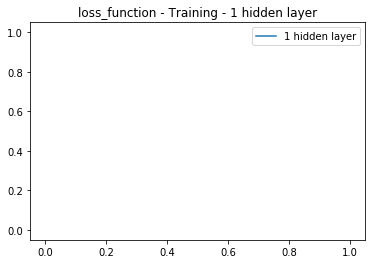

In [58]:
plt.plot(model.history["loss"])
plt.title("loss_function - Training - 1 hidden layer")
plt.legend(["1 hidden layer"])
plt.show()

In [59]:
min(model.history["loss"])

nan